In [1]:
# Problem Statement:
# Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset.
# Determine the number of clusters using the elbow method.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('sales_data_sample.csv', encoding="unicode_escape")

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [6]:
df.shape

(2823, 25)

In [7]:
df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [8]:
df['ADDRESSLINE2'] = df['ADDRESSLINE2'].fillna('NA')
df['STATE'] = df['STATE'].fillna('NA')
df = df.dropna(axis = 0, subset=['POSTALCODE', 'TERRITORY'])

In [9]:
df.isna().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [13]:
df_numeric = df.select_dtypes(include=[np.number])

In [14]:
df_numeric

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
1,10121,34,81.35,5,2765.90,2,5,2003,95
2,10134,41,94.74,2,3884.34,3,7,2003,95
6,10180,29,86.13,9,2497.77,4,11,2003,95
7,10188,48,100.00,1,5512.32,4,11,2003,95
9,10211,41,100.00,14,4708.44,1,1,2004,95
...,...,...,...,...,...,...,...,...,...
2816,10327,37,86.74,4,3209.38,4,11,2004,54
2818,10350,20,100.00,15,2244.40,4,12,2004,54
2819,10373,29,100.00,1,3978.51,1,1,2005,54
2820,10386,43,100.00,4,5417.57,1,3,2005,54


In [15]:
# Scaling and Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [19]:
df_scaled

array([[-1.46233288, -0.0967145 , -0.10775236, ..., -0.51242379,
        -1.16604738, -0.13826168],
       [-1.32503481,  0.62134226,  0.56156253, ...,  0.02231917,
        -1.16604738, -0.13826168],
       [-0.83921085, -0.60961218,  0.13118156, ...,  1.0918051 ,
        -1.16604738, -0.13826168],
       ...,
       [ 1.19913748, -0.60961218,  0.82448981, ..., -1.58190972,
         1.67238945, -1.16196919],
       [ 1.33643555,  0.82650134,  0.82448981, ..., -1.04716675,
         1.67238945, -1.16196919],
       [ 1.45261085, -0.0967145 , -1.06298818, ..., -1.04716675,
         1.67238945, -1.16196919]])

In [25]:
# K means clustering
from sklearn.cluster import KMeans

inertia = []
k_min, k_max = 1, 21

for i in range(k_min, k_max):
    kmeans = KMeans(n_clusters=i, random_state=45, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
inertia

[15740.999999999989,
 12543.349699409891,
 10612.32412831287,
 9156.319510734418,
 8325.85376247472,
 7707.039783878339,
 7196.637425024057,
 6826.64256959901,
 6494.800962692491,
 6179.126209840662,
 5937.2545045640445,
 5712.078692133747,
 5503.963736825898,
 5282.015896156883,
 5096.008263401829,
 4953.246470984014,
 4838.774110430128,
 4707.033229010015,
 4593.90352431493,
 4426.208024599824]

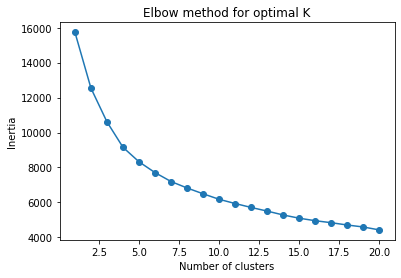

In [27]:
plt.plot(range(k_min, k_max), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal K')
plt.show()